# Import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading data

In [3]:
data = pd.read_csv("FuelConsumption.csv")
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# Data pre-processing

In [4]:
data.info()
data.corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [5]:
data[["FUELTYPE"]] = data[["FUELTYPE"]].replace({"X":1, "Z":2, "E":3, "D":4})
data.sort_values(by=['FUELCONSUMPTION_COMB'], inplace=True)
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
988,2014,TOYOTA,PRIUS c,COMPACT,1.5,4,AV,1,4.6,4.9,4.7,60,108
487,2014,HONDA,ACCORD HYBRID,MID-SIZE,2.0,4,AV,1,4.7,4.9,4.8,59,110
987,2014,TOYOTA,PRIUS,MID-SIZE,1.8,4,AV,1,4.7,4.9,4.8,59,110
1042,2014,VOLKSWAGEN,JETTA TURBO HYBRID,COMPACT,1.4,4,AM7,2,5.6,5.2,5.4,52,124
415,2014,FORD,FUSION HYBRID,MID-SIZE,2.0,4,AV,1,5.3,5.7,5.5,51,126


# Feature Engineeineering

In [6]:
import seaborn as sns
df = data[['ENGINESIZE','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

df.corr()

,ENGINESIZE,FUELCONSUMPTION_COMB,CO2EMISSIONS
ENGINESIZE,1.000000,0.819482,0.874154
FUELCONSUMPTION_COMB,0.819482,1.000000,0.892129
CO2EMISSIONS,0.874154,0.892129,1.000000


# Data Split on Train & Test Set

In [7]:
from sklearn import model_selection
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(df[['ENGINESIZE','FUELCONSUMPTION_COMB']], df[['CO2EMISSIONS']], test_size=0.2, random_state=1)

# Choosing Model

In [8]:
from sklearn import svm

# Initialize Model

In [9]:
svrR = svm.SVR()
svrL = svm.SVR(kernel='linear', C=160, epsilon=13, gamma='auto')
svrP = svm.SVR(kernel='poly',C=160, epsilon=13, gamma='auto')

# Train Model

In [10]:
svrL.fit(xtrain, ytrain.values.ravel())
svrR.fit(xtrain, ytrain.values.ravel())
svrP.fit(xtrain, ytrain.values.ravel())

SVR(C=160, epsilon=13, gamma='auto', kernel='poly')

# Test Prediction Model

In [11]:
ypredR = svrR.predict(xtest)
ypredL = svrL.predict(xtest)
ypredP = svrP.predict(xtest)

# Evaluate Model

In [12]:
from sklearn import metrics
print("MSE: ", metrics.mean_squared_error(ypredR, ytest))
print("R2 Score: ", metrics.r2_score(ypredR, ytest))

print("MSE: ", metrics.mean_squared_error(ypredL, ytest))
print("R2 Score: ", metrics.r2_score(ypredL, ytest))

print("MSE: ", metrics.mean_squared_error(ypredP, ytest))
print("R2 Score: ", metrics.r2_score(ypredP, ytest))

MSE:  531.8920194051193
R2 Score:  0.8117320317105622
MSE:  463.8482804003524
R2 Score:  0.8843230413411403
MSE:  11088.520735442708
R2 Score:  0.4225917341662484



# Model Analyssis

In [13]:
line1 = np.linspace(1,9,853).reshape(-1,1)
line2 = np.linspace(4.7,24.7,853).reshape(-1,1)
feature = pd.DataFrame(
    {
        "E": line1[:, 0],
        "F": line2[:, 0]
    }
)


# Model Visualize

In [14]:
# Train and Test set
from sklearn import model_selection
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(
    df[['ENGINESIZE', 'FUELCONSUMPTION_COMB']], df[['CO2EMISSIONS']], test_size=0.2, random_state=1)

##Choosing model
from sklearn import svm

##Initialize model
svrL = svm.SVR(kernel='linear', C=170, epsilon=8)
svrR = svm.SVR( C=170, epsilon=8, gamma='auto')
svrP = svm.SVR(kernel='poly',C=170, epsilon=8, gamma='auto', degree=2)
## Tarin model
svrL.fit(xtrain, ytrain.values.ravel())
svrR.fit(xtrain, ytrain.values.ravel())
svrP.fit(xtrain, ytrain.values.ravel())

## Test Prediction
ypred = svrL.predict(xtest)
ypredR = svrR.predict(xtest)
ypredP = svrP.predict(xtest)

## Evaluate
from sklearn import metrics
print("MSE: ", metrics.mean_squared_error(ypred, ytest))
print("R2 Score: ", metrics.r2_score(ypred, ytest))
print("MSE: ", metrics.mean_squared_error(ypredR, ytest))
print("R2 Score: ", metrics.r2_score(ypredR, ytest))
print("MSE: ", metrics.mean_squared_error(ypredP, ytest))
print("R2 Score: ", metrics.r2_score(ypredP, ytest))

MSE:  553.9516899184295
R2 Score:  0.8787959453577443
MSE:  490.8003507090023
R2 Score:  0.8606282731850741
MSE:  646.4861273976204
R2 Score:  0.8357017600281558


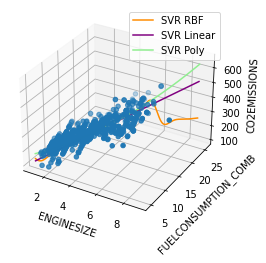

In [15]:
## 3D Plot
fig = plt.figure()
axes = plt.axes(projection="3d")

axes.scatter3D(xtrain[['ENGINESIZE']], xtrain[['FUELCONSUMPTION_COMB']], ytrain.values.ravel())
axes.plot3D(
    feature[["E"]].values.ravel(),
    feature[["F"]].values.ravel(),
    svrR.predict(feature),
    c="darkorange",
    label="SVR RBF"
)
axes.plot3D(
    feature[["E"]].values.ravel(),
    feature[["F"]].values.ravel(),
    svrL.predict(feature),
    c="purple",
    label="SVR Linear"
)
axes.plot3D(
    feature[["E"]].values.ravel(),
    feature[["F"]].values.ravel(),
    svrP.predict(feature),
    c="lightgreen",
    label="SVR Poly"
)

axes.set_xlabel("ENGINESIZE")
axes.set_ylabel("FUELCONSUMPTION_COMB")
axes.set_zlabel("CO2EMISSIONS")
plt.legend()
plt.show()